In [1]:
from models.simple import SimpleModel

dictionary = {
    'simple': SimpleModel
}

In [59]:
import pandas

df = pandas.read_csv('data.csv')

In [60]:
df2 = df[df['userId'] == 'qtW5EhH8cUORCIwwOSiX']


In [61]:
words = df2['word'].to_list()
signals = df2['signal'].to_list()

In [62]:
train_words = words[:1300]
eval_words = words[1300:]
train_signals = signals[:1300]
eval_signals = signals[1300:]

[0.1        0.99999979 0.1        ... 0.1        0.99998307 0.99999998]


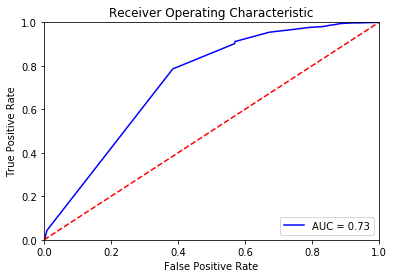

In [67]:
import numpy as np
from sklearn.metrics import cohen_kappa_score, recall_score, accuracy_score
import sklearn.metrics as metrics

for k, f in dictionary.items():
    a = f(0.1,0.1,0.1,0)
    a.fit(train_words, train_signals)
    predicted = [a.predict(s) for s in eval_words]
    predicted = np.array(predicted)
    evaluated = np.array(eval_signals)
    print(predicted)
    fpr, tpr, threshold = metrics.roc_curve(1-evaluated, 1-predicted)
    roc_auc = metrics.auc(fpr, tpr)
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])    
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [10]:
print(a.prob)

 0.9998449413947117, 'head': 0.9999999999999986, 'put': 0.9999999999987662, 'finger': 0.9999181575211958, 'lip': 0.9999913843713304, 'felt': 0.9999999045351571, 'insid': 0.9999999989422177, 'trembl': 0.9992230369543048, 'stole': 0.9992230369543048, 'quiet': 0.9999999045351571, 'opposit': 0.9992230369543048, 'side': 0.9999999989422177, 'room': 0.9999999999998702, 'girl': 1.0, 'could': 1.0, 'hard': 0.992667277726856, 'wait': 0.9999913843713304, 'reaction': 0.992667277726856, 'hastili': 0.992667277726856, 'wipe': 0.992667277726856, 'bowl': 0.9999913843713304, 'discard': 0.992667277726856, 'rag': 0.9999913843713304, 'wash': 0.9992230369543048, 'hand': 1.0, 'gather': 0.9999181575211958, 'embroideri': 0.992667277726856, 'project': 0.9999181575211958, 'join': 0.9999181575211958, 'woman': 1.0, 'household': 0.9999836757767806, 'hall': 0.9999999999987662, 'work': 1.0, 'older': 0.9999181575211958, 'talk': 0.992667277726856, 'chat': 0.992667277726856, 'bright': 0.9999913843713304, 'sometim': 0.999



$  $